In [2]:
import numpy as np
from IPython import display

## Scenario - Harry in the prision
Harry wants to rescue his god father .
* He needs to go through a strong windy enviroment.

He most avoid some really strong air currents.

In order to ensure maximum reward, Harry will need to learn the less conflicted path between his godfather while going the through the air currents. 
* We will use Q-learning to help him!

## Define the Environment
The environment consists of **states**, **actions**, and **rewards**. States and actions are inputs for the Q-learning AI agent, while the possible actions are the AI agent's outputs.
#### States
The states in the environment are all of the possible locations in the windy camp. Some of these locations have strong air currents (**ARROWS**), while other locations are free of currents where haryy  can use to fly throughout the camp with out getting blow (**white squares**). The **G square** indicates his godfather location.

The  G is the **terminal state**!

As shown in the image above, there are 63 possible states (locations) within the camp. These states are arranged in a grid containing 7 rows and 9 columns. Each location can  be identified by its row and column index

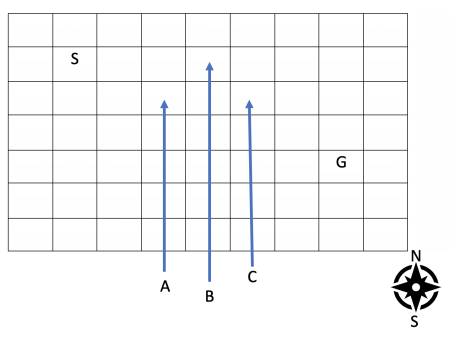

In [3]:
display.Image("./assets/Camp map.png")

In [4]:
#define the shape of the environment (i.e., its states)
environment_rows = 7
environment_columns = 9

#Create a 3D numpy array to hold the current Q-values for each state and action pair: Q(s, a) 
#The array contains 11 rows and 11 columns (to match the shape of the environment), as well as a third "action" dimension.
#The "action" dimension consists of 4 layers that will allow us to keep track of the Q-values for each possible action in
#each state (see next cell for a description of possible actions). 
#The value of each (state, action) pair is initialized to 0.
q_values = np.zeros((environment_columns, environment_rows, 9))

In [5]:
q_values

array([[[0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 0., 0., 0., 0.,

In [12]:
#define actions
#numeric action codes: 0 = nort, 1 = east, 2 = sur, 3 = west
actions = ['nort', 'east', 'sur', 'west']

the AI agent must learn to avoid driving into the windy locations 

#### Rewards
The last component of the environment that we need to define are the **rewards**. 

To help the AI agent learn, each state (location) in the camp is assigned a reward value.

The agent may begin at the S position, but its goal is always the same: ***to maximize its total rewards***!

Negative rewards **punishments**) are used for some states except the goal.
* This encourages the AI to identify the *shortest path* to the goal by *minimizing its punishments*!
* In the mediums columns it must figure out how to get out of there, fin

To maximize its cumulative rewards (by minimizing its cumulative punishments), the AI agent will need find the shortest paths between the Sirius (green square) and all of the other locations in the camp where the harry can be (white squares). The agent will also need to learn to avoid the windy locations (black squares)!

In [15]:
#Create a 2D numpy array to hold the rewards for each state. 
#The array contains 7 rows and 9 columns (to match the shape of the environment).
rewards = np.full((environment_rows, environment_columns), 1.)
rewards[4, 7] = 100. #set the reward for the Sirius plcae (the goal) to 100

#define safe locations (white squares) for rows 0 through 6
safeP = {} #store locations in a dictionary
safeP[0] = [3,4,5]
safeP[1] = [3,4,5]
safeP[2] = [3,4,5]
safeP[3] = [3,4,5]
safeP[4] = [3,4,5]
safeP[5] = [3,4,5]
safeP[6] = [3,4,5]



#set the rewards for all aisle locations (i.e., white squares)
for row_index in range(0,7):
    for column_index in safeP[row_index]:
        rewards[row_index, column_index] = 1.
        rewards[row_index-1, column_index] = -2.
        rewards[row_index-5, column_index] = -3.
  
    #print rewards matrix
for row in rewards:
    print(row)

[ 1.  1.  1. -3. -3. -3.  1.  1.  1.]
[ 1.  1.  1. -3. -3. -3.  1.  1.  1.]
[ 1.  1.  1. -2. -2. -2.  1.  1.  1.]
[ 1.  1.  1. -2. -2. -2.  1.  1.  1.]
[  1.   1.   1.  -2.  -2.  -2.   1. 100.   1.]
[ 1.  1.  1. -2. -2. -2.  1.  1.  1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1.]


The penalization is greater when it reachs the top

## Train the Model
Our next task is for our AI agent to learn about its environment by implementing a Q-learning model. The learning process will follow these steps:
1. Choose a random, non-terminal state (white square) for the agent to begin this new episode.
2. Choose an action (move *nort*, *east*, *sur*, or *west*) for the current state. Actions will be chosen using an *epsilon greedy algorithm*. This algorithm will usually choose the most promising action for the AI agent, but it will occasionally choose a less promising option in order to encourage the agent to explore the environment.
3. Perform the chosen action, and transition to the next state (move to the next location).
4. Receive the reward for moving to the new state, and calculate the temporal difference.
5. Update the Q-value for the previous state and action pair.
6. If the new (current) state is a terminal state, you won
This entire process will be repeated across 1000 episodes. This will provide the AI agent sufficient opportunity to learn 
#### Define Helper Functions

In [26]:
#define a function that determines if the  location is a terminal state
def is_terminal_state(current_row_index, current_column_index):
  #if the reward for this location is 1, then it is not a terminal state 
  if rewards[current_row_index, current_column_index] == 100.:
    return True
  else:
    return False
def is_change_action(current_row_index, current_column_index):
  #if the reward for this location is 1, then it is not a terminal state 
  if rewards[current_row_index, current_column_index] != 1.:
    return True
  else:
    return False
#starting location
def get_starting_location():
    current_row_index = 1
    current_column_index = 1
    return current_row_index, current_column_index

#define an epsilon greedy algorithm that will choose which action to take next 
def get_next_action(current_row_index, current_column_index, epsilon):
    #if a randomly chosen value between 0 and 1 is less than epsilon, 
   #Constrains
    if current_column_index == 3:
        if np.random.random() == 0.2:
            action_index = 0
    if current_column_index == 4:
        if np.random.random() == 0.3:
            action_index = 0
    if current_column_index == 5:
        if np.random.random() == 0.25:
            action_index = 0
    #then choose the most promising value from the Q-table for this state.
    if np.random.random() < epsilon:
        return np.argmax(q_values[current_row_index, current_column_index])
    else: #choose a random action
        return np.random.randint(4)

#define a function that will get the next location based on the chosen action
def get_next_location(current_row_index, current_column_index, action_index):
    new_row_index = current_row_index
    new_column_index = current_column_index
    if actions[action_index] == 'nort' and current_row_index > 0:
        new_row_index -= 1
    elif actions[action_index] == 'east' and current_column_index < environment_columns - 1:
        new_column_index += 1
    elif actions[action_index] == 'sur' and current_row_index < environment_rows - 1:
        new_row_index += 1
    elif actions[action_index] == 'west' and current_column_index > -1:
        new_column_index -= 1
    return new_row_index, new_column_index

#Define a function that will get the shortest path between any location within the camp that 
#Harry is allowed to continue.
def get_the_less_conflicted_path(start_row_index, start_column_index):
    if is_terminal_state(start_row_index, start_column_index):
        return []
    else: 
        current_row_index, current_column_index = start_row_index, start_column_index
        less_conflicted_path = []
        less_conflicted_path.append([current_row_index, current_column_index])
        #continue moving along the path until we reach the goal 
        while not is_terminal_state(current_row_index, current_column_index):
        #get the best action to take
            action_index = get_next_action(current_row_index, current_column_index, 1.)
            #move to the next location on the path, and add the new location to the list
            current_row_index, current_column_index = get_next_location(current_row_index, current_column_index, action_index)
            less_conflicted_path.append([current_row_index, current_column_index])
        return less_conflicted_path

In [ ]:
#define training parameters
epsilon = 0.9 #the percentage of time when we should take the best action (instead of a random action)
discount_factor = 0.9 #discount factor for future rewards
learning_rate = 0.9 #the rate at which the AI agent should learn

#run through 1000 training episodes
for episode in range(1000):
    #get the starting location for this episode
    row_index, column_index = get_starting_location()
    while not is_terminal_state(row_index, column_index):
        #choose which action to take (i.e., where to move next)
        action_index = get_next_action(row_index, column_index, epsilon)
        
        #perform the chosen action, and transition to the next state move to the next location)
        old_row_index, old_column_index = row_index, column_index #store the old row and column indexes
        row_index, column_index = get_next_location(row_index, column_index, action_index)
        if is_change_action(row_index, column_index):
            action_index = get_next_action(row_index, column_index, epsilon)
        #receive the reward for moving to the new state, and calculate the temporal difference
        reward = rewards[row_index, column_index]
        old_q_value = q_values[old_row_index, old_column_index, action_index]
        temporal_difference = reward + (discount_factor * np.max(q_values[row_index, column_index])) - old_q_value

        #update the Q-value for the previous state and action pair
        new_q_value = old_q_value + (learning_rate * temporal_difference)
        q_values[old_row_index, old_column_index, action_index] = new_q_value

    print('Training complete!')

In [ ]:
#display a few less conflcited path
print(get_the_less_conflicted_path(1, 1)) #starting at row 1, column 1


At this point with the less conflicted path we would check the states with a Value iteration function

In [ ]:
def value_iteration(env, gamma = 1.0):
    value_table = np.zeros(env.observation_space.n)
    no_of_iterations = 100000
    threshold = 1e-20
    for i in range(no_of_iterations):
        updated_value_table = np.copy(value_table)
        for state in range(env.observation_space.n):
            Q_value = []
            for action in range(env.action_space.n):
                next_states_rewards = []
                for next_sr in env.P[state][action]:
                    trans_prob, next_state, reward_prob, _ = next_sr
                    next_states_rewards.append((trans_prob * (reward_prob +
gamma * updated_value_table[next_state])))
                Q_value.append(np.sum(next_states_rewards))
            value_table[state] = max(Q_value)
        if (np.sum(np.fabs(updated_value_table - value_table)) <=
threshold):
            print ('Value-iteration converged at iteration# %d.' %(i+1))
            break
    return value_table


In [ ]:
def extract_policy(value_table, gamma = 1.0):
    policy = np.zeros(env.observation_space.n)
    for state in range(env.observation_space.n):
        Q_table = np.zeros(env.action_space.n)
        for action in range(env.action_space.n):
            for next_sr in env.P[state][action]:
                trans_prob, next_state, reward_prob, _ = next_sr
                Q_table[action] += (trans_prob * (reward_prob + gamma *
value_table[next_state]))
        policy[state] = np.argmax(Q_table)
    return policy

And we would use the extract policy func with the value_table of value_iteration func

In [ ]:
optimal_value_function = value_iteration(env=env,gamma=1.0)
optimal_policy = extract_policy(optimal_value_function, gamma=1.0)
print(optimal_policy)

We would get the optimal policy